## Financial Market Analytics Project

In [1]:
# All imports
import pandas as pd
import numpy as np
from scipy.stats import skew
from datetime import datetime, timedelta
import plotly.express as px
import plotly.io as pio


In [2]:
# Read the data, skipping the first row and using the second row as headers
df_sp_m_new = pd.read_excel("../Datasets/SPX500.xlsx", sheet_name="Price", engine="openpyxl", skiprows=[0], header=0)
#df_stoxx_m_new = pd.read_excel("../Datasets/Stoxx600.xlsm", sheet_name="Price", engine="openpyxl", skiprows=[0], header=0)

df_sp_d_new = pd.read_excel("../Datasets/SPX500.xlsx", sheet_name="Price daily", engine="openpyxl", skiprows=[0], header=0)
#df_stoxx_d_new = pd.read_excel("../Datasets/Stoxx600.xlsm", sheet_name="Price daily", engine="openpyxl", skiprows=[0], header=0)


# Flatten the MultiIndex columns created by read_excel with header=0 and skiprows=[0]
df_sp_m_new.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_sp_m_new.columns]
#df_stoxx_m_new.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_stoxx_m_new.columns]
df_sp_d_new.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_sp_d_new.columns]
#df_stoxx_d_new.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_stoxx_d_new.columns]


print("Nuovo df_sp_m head:")
display(df_sp_m_new.head())

Nuovo df_sp_m head:


,data,3M Co,Abbott Laboratories,ACME-Cleveland Corp,Advanced Micro Devices Inc,AEP Texas Inc,Aeroquip-Vickers Inc,AIG Life Holdings Inc,Air Products & Chemicals Inc,Alberto-Culver Co,...,Cboe Global Markets Inc.1,United Continental Holdings Inc.1,WellCare Health Plans Inc,Advanced Micro Devices Inc.2,Fortinet Inc,Linde PLC,Rollins Inc,Jack Henry & Associates Inc,Keysight Technologies Inc,Regency Centers Corp.1
0,1990-12-31,20.629,5.0348,4.750,2.4375,22.0000,18.250,7.6875,12.6542,9.5408,...,NaN,NaN,NaN,NaN,NaN,NaN,1.2437,0.1250,NaN,NaN
1,1991-01-31,20.419,4.8810,5.375,3.5625,22.0000,22.000,8.1875,13.6364,9.2897,...,NaN,NaN,NaN,NaN,NaN,NaN,1.2144,0.1667,NaN,NaN
2,1991-02-28,21.291,5.1887,6.625,4.0625,22.0000,24.375,9.1875,14.8499,8.8234,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3242,0.2292,NaN,NaN
3,1991-03-29,21.291,5.3705,6.625,5.1875,22.5625,22.500,9.6250,15.6588,8.5723,...,NaN,NaN,NaN,NaN,NaN,NaN,1.4047,0.2500,NaN,NaN
4,1991-04-30,21.441,5.6642,6.500,6.1250,23.3750,22.125,9.6875,14.4165,7.2452,...,NaN,NaN,NaN,NaN,NaN,NaN,1.4120,0.2986,NaN,NaN


### Skewness
In this step, we filter the dataset to include only the last six months of data, then calculate the percentage of missing values for each stock. We retain only those stocks with no more than 30% missing data (excluding the 'Dates' column). Next, we compute the skewness of returns for the selected stocks, sort them by skewness, and finally select the top 20% with the highest skewness values.

In [3]:
# Convert all columns except 'Dates' to numeric, coercing errors
for column in df_sp_d_new.columns:
    if column != 'Dates':
        df_sp_d_new[column] = pd.to_numeric(df_sp_d_new[column], errors='coerce')

# Convert 'Dates' column to datetime objects
df_sp_d_new['Dates'] = pd.to_datetime(df_sp_d_new['Dates'])

# Filter for the last 6 months
six_months_ago = df_sp_d_new['Dates'].max() - pd.DateOffset(months=6)
df_sp_d_last_6m_new = df_sp_d_new[df_sp_d_new['Dates'] >= six_months_ago]

# Calculate missing values percentage for each column
missing_percentage_new = df_sp_d_last_6m_new.isnull().mean() * 100

# Select columns with less than or equal to 30% missing values, excluding 'Dates'
cols_to_analyze_new = missing_percentage_new[missing_percentage_new <= 30].index.tolist()
if 'Dates' in cols_to_analyze_new:
    cols_to_analyze_new.remove('Dates')

# Calculate skewness for the selected columns
skewness_values_new = df_sp_d_last_6m_new[cols_to_analyze_new].skew()

# Sort skewness values and select the top 20%
top_20_percent_count_new = int(len(skewness_values_new) * 0.2)
top_skewness_new = skewness_values_new.sort_values(ascending=False).head(top_20_percent_count_new)

print("Top 20% titles with highest skewness in the last 6 months:")
print(top_skewness_new)

Top 20% titles with highest skewness in the last 6 months:
Keurig Dr Pepper Inc         1.377693
Edwards Lifesciences Corp    1.291127
Graham Holdings Co           1.289603
Big Lots Inc                 1.251414
McDonald's Corp              1.127863
                               ...   
Barnett Banks Inc            0.000000
BankBoston Corp              0.000000
BankAmerica Corp/Old         0.000000
Bank One Corp                0.000000
Bally Entertainment Corp     0.000000
Length: 270, dtype: float64


Scatterplot for the skewness for the entire S&P500, and scatterplot of the top 20% titles of S&P500 with highest skewness, in the last 6 months.

In [4]:
fig = px.scatter(
    x=skewness_values_new.index,
    y=skewness_values_new.values,
    labels={'x': 'Stock', 'y': 'Skewness'},
    title='Skewness of S&P 500 Stocks (Last 6 Months)'
)

pio.renderers.default = 'browser'
fig.show()

fig2 = px.scatter(
    x=top_skewness_new.index,
    y=top_skewness_new.values,
    labels={'x': 'Stock', 'y': 'Skewness'},
    title='Topo 20% Skewness of S&P 500 Stocks (Last 6 Months)'
)

fig2.show()

### Building the momentum portfolio
This section aims to construct a portfolio of 10 stocks based on a momentum investing strategy.
To compute momentum, we consider the price change over the past 12 months while excluding the most recent month to avoid the short-term reversal effect.
The momentum is computed with the formula: momentum_values = prices_1m_ago - prices_12m_ago.

In [5]:
df = df_sp_d_new.copy()
df.iloc[:,0] = pd.to_datetime(df.iloc[:,0])
df = df.sort_values(by=df.columns[0])

# Set the date column as an index to facilitate time slicing
df.set_index(df.columns[0], inplace=True)

# Define dates to compute momentum
last_date = df.index.max()
date_1m_ago = last_date - pd.DateOffset(months=1)
date_12m_ago = last_date - pd.DateOffset(months=12)

# Prices closest to 1 month and 12 months ago
prices_1m_ago = df.loc[:date_1m_ago].iloc[-1]
prices_12m_ago = df.loc[:date_12m_ago].iloc[-1]

# Computing momentum for each stock
momentum_values = prices_1m_ago - prices_12m_ago

# Dataframe with stocks and momentum values
momentum = pd.DataFrame({
    'titolo': momentum_values.index,
    'momentum': momentum_values.values
})

# Fixing top_skewness_new
titoli_skew = top_skewness_new.index.tolist()

# Filtering momentum for the titles with high skewness
momentum_filtered = momentum[momentum['titolo'].isin(titoli_skew)]

# Sorting by momentum and selecting the top 10
top10 = momentum_filtered.sort_values(by='momentum', ascending=False).head(10)

# Costruisci il portfolio prendendo i prezzi all'ultima data disponibile per i titoli top10
#portfolio = df.loc[last_date, top10['titolo']]

print("Top 10 Stocks with higher momentum:")
print(top10)

#print("\nPrezzi ultimi disponibili per il portfolio:")
#print(portfolio)


Top 10 Stocks with higher momentum:
                                 titolo  momentum
1159         Chipotle Mexican Grill Inc  157.3800
1015                      CME Group Inc  126.7250
36        Automatic Data Processing Inc  105.9307
1135               Booking Holdings Inc   96.2900
1077             Intuitive Surgical Inc   91.0400
684       Marriott International Inc/MD   71.6700
1029                IAC/InterActiveCorp   66.0100
1346  United Continental Holdings Inc.1   62.2200
975                        Intuit Inc.1   45.5800
810                          Intuit Inc   45.5800


In [6]:
# scatterplot dei titoli e il loro momentum
fig3 = px.scatter(
    x=momentum_filtered['titolo'],
    y=momentum_filtered['momentum'],
    labels={'x': 'Stock', 'y': 'Momentum'},
    title='Momentum of Selected S&P 500 Stocks with High Skewness (top20%, lsat 6 months)',
)
fig3.show()

### Comparison with the Markovitz optimal portfolio
Comparing a Markowitz mean-variance optimal portfolio with our momentum + skewness strategy is a great way to validate whether this factor-based method adds value. The S&P500 dataset will be used.


Markowitz Optimal Portfolio:
Expected Annual Return: 0.1445
Annual Volatility: 0.0750
Sharpe Ratio: 1.9262

Selected Stock Weights (> 1%):
McDonnell Douglas Corp                  0.089060
USLIFE Corp                             0.081479
Church & Dwight Co Inc                  0.072916
Pioneer Hi-Bred International Inc       0.059629
NextEra Energy Inc                      0.052918
Hershey Co/The                          0.050071
First Interstate Bancorp                0.045867
Archstone-Smith Trust                   0.038019
Rollins Inc                             0.037983
Jack Henry & Associates Inc             0.034766
Ball Corp                               0.031077
Santa Fe Pacific Corp                   0.030120
Wm Wrigley Jr Co                        0.028816
Boatmen's Bancshares Inc                0.028590
Monster Beverage Corp                   0.028193
Lockheed Martin Tactical Systems Inc    0.027404
Anheuser-Busch Cos Inc                  0.024724
Best Buy Co Inc             

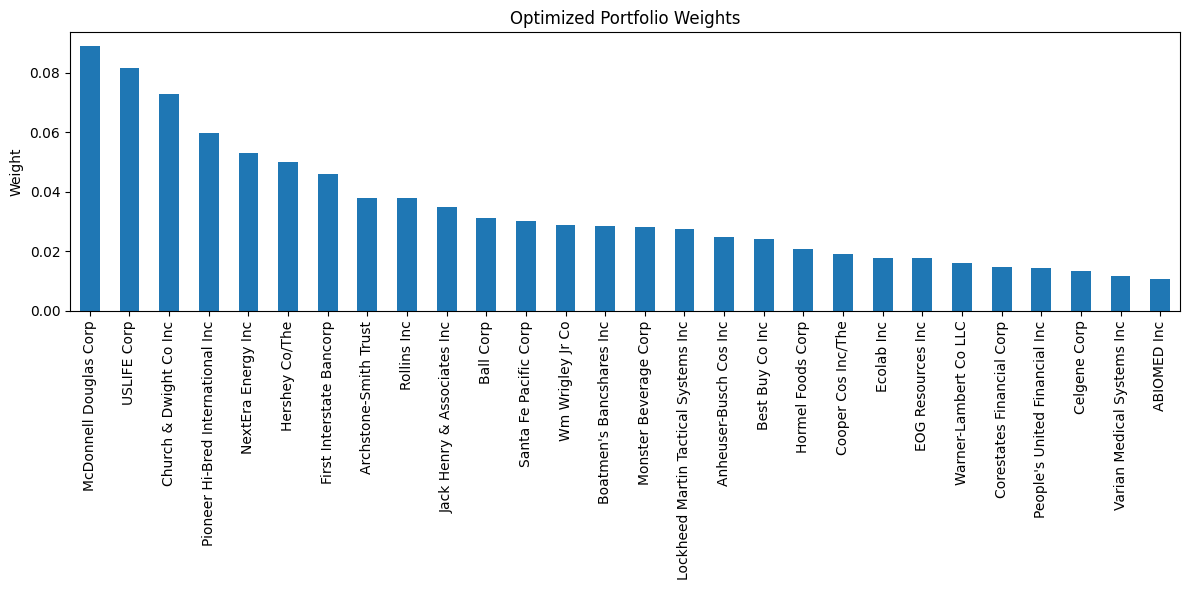

In [7]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# --- Data preparation ---
df_sp_m_new.iloc[:, 0] = pd.to_datetime(df_sp_m_new.iloc[:, 0])
df_sp_m_new.set_index(df_sp_m_new.columns[0], inplace=True)
df_sp_m_new = df_sp_m_new.dropna(axis=1, how='any')  # Drop columns with any missing values
monthly_returns = df_sp_m_new.pct_change().dropna()

# Filter: Keep only stocks with positive average returns
avg_returns = monthly_returns.mean()
monthly_returns = monthly_returns.loc[:, avg_returns > 0]

# Compute annualized mean returns and volatilities
annualized_returns = monthly_returns.mean() * 12
annualized_volatility = monthly_returns.std() * np.sqrt(12)

# Compute individual Sharpe ratios (assuming risk-free rate = 0)
individual_sharpe = annualized_returns / annualized_volatility

# Filter: keep only stocks with Sharpe ratio above threshold (e.g. 0.5)
sharpe_threshold = 0.5
filtered_tickers = individual_sharpe[individual_sharpe > sharpe_threshold].index.tolist()

# Filter the monthly returns based on Sharpe-filtered tickers
monthly_returns_filtered = monthly_returns[filtered_tickers]

# Precompute mean returns and covariance matrix once
mean_returns = monthly_returns_filtered.mean()
cov_matrix = monthly_returns_filtered.cov()

# --- Portfolio statistics ---
def portfolio_stats(weights):
    port_return = np.dot(weights, mean_returns) * 12
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 12, weights)))
    sharpe = port_return / port_vol
    return port_return, port_vol, sharpe

def neg_sharpe_ratio(weights):
    return -portfolio_stats(weights)[2]

# Constraints: weights must sum to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: no short selling, weights between 0 and 1
bounds = tuple((0, 1) for _ in range(len(monthly_returns_filtered.columns)))

# Initial guess: equal weights
initial_weights = np.array([1 / len(monthly_returns_filtered.columns)] * len(monthly_returns_filtered.columns))

# --- Optimization ---
opt_result = minimize(neg_sharpe_ratio, initial_weights,
                      method='SLSQP',
                      bounds=bounds,
                      constraints=constraints)

# --- Results ---
opt_weights = opt_result.x
port_return, port_vol, sharpe_ratio = portfolio_stats(opt_weights)

print("Markowitz Optimal Portfolio:")
print(f"Expected Annual Return: {port_return:.4f}")
print(f"Annual Volatility: {port_vol:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

# Display weights > 1%
opt_portfolio = pd.Series(opt_weights, index=monthly_returns_filtered.columns)
opt_portfolio = opt_portfolio[opt_portfolio > 0.01].sort_values(ascending=False)

print("\nSelected Stock Weights (> 1%):")
print(opt_portfolio)

# --- Plot optimized portfolio weights ---
opt_portfolio.plot(kind='bar', figsize=(12, 6), title='Optimized Portfolio Weights')
plt.ylabel("Weight")
plt.tight_layout()
plt.show()


In [8]:
print(opt_portfolio.sum())  # should be close to 1, possibly a bit less due to filtering >1%
print(opt_weights.sum())


0.9418411406062509
1.000000000001347


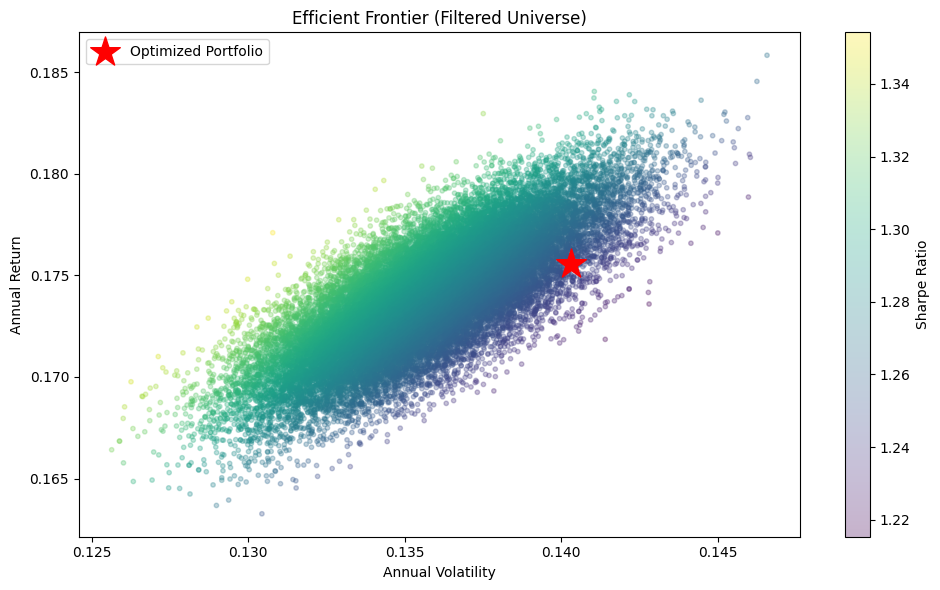

In [9]:
# --- Efficient Frontier using filtered data ---
num_portfolios = 30000
mean_returns = monthly_returns_filtered.mean() * 12
cov_matrix = monthly_returns_filtered.cov() * 12

results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(monthly_returns_filtered.columns))
    weights /= np.sum(weights)
    weights_record.append(weights)

    port_return = np.dot(weights, mean_returns)
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = port_return / port_vol

    results[0, i] = port_return
    results[1, i] = port_vol
    results[2, i] = sharpe_ratio

# --- Plot Efficient Frontier ---
plt.figure(figsize=(10, 6))
scatter = plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', s=10, alpha=0.3)
plt.colorbar(scatter, label='Sharpe Ratio')
plt.xlabel('Annual Volatility')
plt.ylabel('Annual Return')
plt.title('Efficient Frontier (Filtered Universe)')

# Plot the optimized portfolio
plt.scatter(port_vol, port_return, marker='*', color='r', s=500, label='Optimized Portfolio')
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
# Ensure datetime and index
df = df_sp_d_new.copy()
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])
df.set_index(df.columns[0], inplace=True)
df = df.sort_index()

# Step 1: Get list of top 10 momentum tickers
momentum_tickers = top10['titolo'].tolist()

# Step 2: Extract only those columns
df_top10 = df[momentum_tickers]

# Step 3: Resample to monthly frequency using last trading day of each month
df_top10_monthly = df_top10.resample('M').last()

# Step 4: Compute monthly returns
monthly_returns_top10 = df_top10_monthly.pct_change().dropna()

# (Optional) Show the result
print(monthly_returns_top10.head())


            Chipotle Mexican Grill Inc  CME Group Inc  \
Dates                                                   
2006-03-31                    0.214693       0.051457   
2006-04-30                   -0.057772       0.023464   
2006-05-31                    0.106917      -0.036463   
2006-06-30                    0.055046       0.112962   
2006-07-31                   -0.138638      -0.060979   

            Automatic Data Processing Inc  Booking Holdings Inc  \
Dates                                                             
2006-03-31                      -0.011042              0.011813   
2006-04-30                      -0.035026             -0.016103   
2006-05-31                       0.031533              0.272504   
2006-06-30                      -0.002637             -0.039871   
2006-07-31                      -0.035060             -0.099799   

            Intuitive Surgical Inc  Marriott International Inc/MD  \
Dates                                                        

C:\Users\2830d\AppData\Local\Temp\ipykernel_7092\3625072779.py:14: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [11]:
import numpy as np
import pandas as pd

# Step 1: Lista ticker portafoglio momentum
momentum_tickers = top10['titolo'].tolist()

# Step 2: Pesi uguali per momentum
momentum_weights = np.array([1 / len(momentum_tickers)] * len(momentum_tickers))

# Step 3: Calcolo rendimenti mensili portafoglio momentum
momentum_returns = monthly_returns_top10[momentum_tickers]

momentum_portfolio_series = pd.Series(
    momentum_returns.values @ momentum_weights,
    index=momentum_returns.index,
    name='momentum'
)

# Step 4: Calcolo metriche annualizzate (assumiamo 12 mesi)
momentum_return = momentum_portfolio_series.mean() * 12
momentum_volatility = momentum_portfolio_series.std() * np.sqrt(12)
momentum_sharpe = momentum_return / momentum_volatility

# Output
print("\nMomentum Portfolio:")
print(f"Expected Annual Return: {momentum_return:.4f}")
print(f"Annual Volatility: {momentum_volatility:.4f}")
print(f"Sharpe Ratio: {momentum_sharpe:.4f}")



Momentum Portfolio:
Expected Annual Return: 0.2457
Annual Volatility: 0.2668
Sharpe Ratio: 0.9209


In [14]:
# Controlla e imposta l'indice come DatetimeIndex
df_sp_m_new[df_sp_m_new.columns[0]] = pd.to_datetime(df_sp_m_new[df_sp_m_new.columns[0]])
df_sp_m_new.set_index(df_sp_m_new.columns[0], inplace=True)

# Calcolo rendimenti mensili semplici
monthly_returns = df_sp_m_new.pct_change().dropna()

# Ora l'indice deve essere DatetimeIndex
print(type(monthly_returns.index))  # deve stampare <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

# Se è DatetimeIndex, puoi prendere gli ultimi 12 mesi con .last()
end_date = monthly_returns.index.max()
start_date = end_date - pd.DateOffset(months=12)

last_12_months = monthly_returns.loc[(monthly_returns.index > start_date) & (monthly_returns.index <= end_date)]

# Segue come prima
n_tickers = last_12_months.shape[1]
weights = np.array([1 / n_tickers] * n_tickers)

portfolio_returns = last_12_months.values @ weights
portfolio_returns = pd.Series(portfolio_returns, index=last_12_months.index)

expected_annual_return = portfolio_returns.mean() * 12
annual_volatility = portfolio_returns.std() * np.sqrt(12)
sharpe_ratio = expected_annual_return / annual_volatility

print("Sharpe Ratio ultimo anno (portafoglio equal-weight S&P500):")
print(f"Expected Annual Return: {expected_annual_return:.4f}")
print(f"Annual Volatility: {annual_volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Sharpe Ratio ultimo anno (portafoglio equal-weight S&P500):
Expected Annual Return: 0.1486
Annual Volatility: 0.1861
Sharpe Ratio: 0.7985


In [20]:

# Step 0: Assicurati che la colonna data sia indice di tipo DatetimeIndex
df_sp_m_new[df_sp_m_new.columns[0]] = pd.to_datetime(df_sp_m_new[df_sp_m_new.columns[0]])
df_sp_m_new.set_index(df_sp_m_new.columns[0], inplace=True)

# Step 1: Lista ticker portafoglio momentum
momentum_tickers = top10['titolo'].tolist()

# Step 2: Pesi uguali per momentum
momentum_weights = np.array([1 / len(momentum_tickers)] * len(momentum_tickers))

# Step 3: Calcolo rendimenti mensili per TUTTO il periodo disponibile
# Calcolo rendimenti percentuali mensili semplici
monthly_returns = df_sp_m_new.pct_change().dropna()

# Filtra solo i ticker del portafoglio momentum (attenzione a ticker mancanti)
momentum_tickers_filtered = [t for t in momentum_tickers if t in monthly_returns.columns]
momentum_returns = monthly_returns[momentum_tickers_filtered]

# Step 4: Calcolo rendimento mensile portafoglio momentum (weighted average)
momentum_portfolio_series = pd.Series(
    momentum_returns.values @ momentum_weights[:len(momentum_tickers_filtered)],
    index=momentum_returns.index,
    name='momentum'
)

# Step 5: Calcolo metriche annualizzate (assumiamo 12 mesi/anno)
momentum_return = momentum_portfolio_series.mean() * 12
momentum_volatility = momentum_portfolio_series.std() * np.sqrt(12)
momentum_sharpe = momentum_return / momentum_volatility

# Output
print("\nMomentum Portfolio su periodo completo:")
print(f"Expected Annual Return: {momentum_return:.4f}")
print(f"Annual Volatility: {momentum_volatility:.4f}")
print(f"Sharpe Ratio: {momentum_sharpe:.4f}")



Momentum Portfolio su periodo completo:
Expected Annual Return: 0.0188
Annual Volatility: 0.0561
Sharpe Ratio: 0.3350


C:\Users\2830d\AppData\Local\Temp\ipykernel_7092\1836067799.py:12: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Advanced Micro Devices Inc
1970-01-01 00:00:00.000000002   1970-01-01 00:00:00.000000022
1970-01-01 00:00:00.000000003   1970-01-01 00:00:00.000000022
1970-01-01 00:00:00.000000004   1970-01-01 00:00:00.000000022
1970-01-01 00:00:00.000000005   1970-01-01 00:00:00.000000022
1970-01-01 00:00:00.000000006   1970-01-01 00:00:00.000000023
                                             ...             
1970-01-01 00:00:00.000000018   1970-01-01 00:00:00.000000020
1970-01-01 00:00:00.000000025   1970-01-01 00:00:00.000000020
1970-01-01 00:00:00.000000030   1970-01-01 00:00:00.000000020
1970-01-01 00:00:00.000000018   1970-01-01 00:00:00.000000020
1970-01-01 00:00:00.000000021   1970-01-01 00:00:00.000000020
Name: AEP Texas Inc, Length: 336, dtype: datetime64[ns]' has dtype incompatible with float64, please expl

Markowitz Optimal Portfolio:
Expected Annual Return: 0.1126
Annual Volatility: 0.0507
Sharpe Ratio: 2.2195

Selected Stock Weights (> 1%):
Grumman Corp                         0.096554
CBS Broadcasting Inc                 0.078843
McDonnell Douglas Corp               0.067068
Cross & Trecker Corp                 0.054764
Church & Dwight Co Inc               0.043137
Florida Progress Corp                0.040985
First Mississippi Corp               0.040221
Pioneer Hi-Bred International Inc    0.038663
Energy Future Holdings Corp/Old      0.035736
Blockbuster Entertainment Corp       0.032984
Hershey Co/The                       0.032120
USLIFE Corp                          0.028912
Rollins Inc                          0.027491
Southern Co/The                      0.026765
Gerber Products Co                   0.025566
Paramount Communications Inc         0.019485
Monster Beverage Corp                0.019019
Hormel Foods Corp                    0.018056
Jack Henry & Associates Inc      

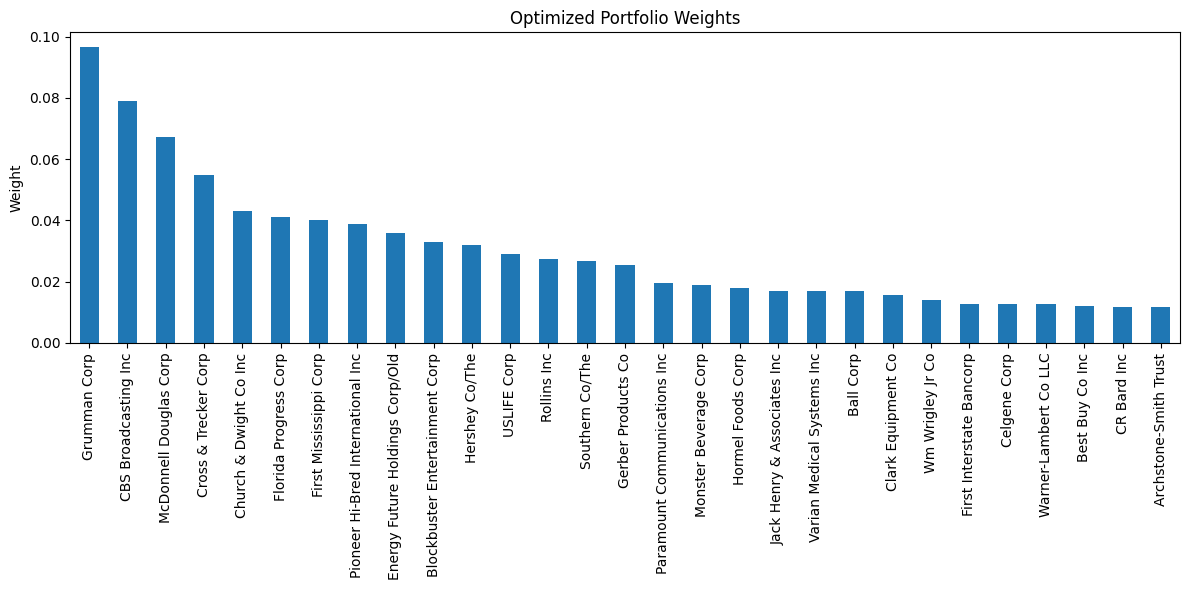

In [23]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# --- Step 1: Preprocessing dataframe ---

# Copia per sicurezza
df = df_sp_m_new.copy()

# Converto prima colonna in datetime
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])

# Imposto la prima colonna come indice
df.set_index(df.columns[0], inplace=True)

# Rimuovo colonne con valori NaN (se ci sono)
df.dropna(axis=1, how='any', inplace=True)

# --- Step 2: Calcolo rendimenti mensili semplici ---
monthly_returns = df.pct_change().dropna()

# --- Step 3: Filtra titoli con rendimento medio positivo ---
avg_returns = monthly_returns.mean()
monthly_returns = monthly_returns.loc[:, avg_returns > 0]

# --- Step 4: Calcolo medie e covarianza ---
mean_returns = monthly_returns.mean()
cov_matrix = monthly_returns.cov()

# --- Step 5: Funzioni per calcolare statistiche portafoglio ---
def portfolio_stats(weights):
    port_return = np.dot(weights, mean_returns) * 12  # annualizzato
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 12, weights)))  # annualizzato
    sharpe = port_return / port_vol
    return port_return, port_vol, sharpe

def neg_sharpe_ratio(weights):
    return -portfolio_stats(weights)[2]

# --- Step 6: Constraints e bounds ---
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(len(monthly_returns.columns)))

# --- Step 7: Inizializzo pesi uguali ---
initial_weights = np.array([1 / len(monthly_returns.columns)] * len(monthly_returns.columns))

# --- Step 8: Ottimizzazione ---
opt_result = minimize(neg_sharpe_ratio, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

# --- Step 9: Risultati ---
opt_weights = opt_result.x
port_return, port_vol, sharpe_ratio = portfolio_stats(opt_weights)

print("Markowitz Optimal Portfolio:")
print(f"Expected Annual Return: {port_return:.4f}")
print(f"Annual Volatility: {port_vol:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

# Pesi > 1%
opt_portfolio = pd.Series(opt_weights, index=monthly_returns.columns)
opt_portfolio = opt_portfolio[opt_portfolio > 0.01].sort_values(ascending=False)

print("\nSelected Stock Weights (> 1%):")
print(opt_portfolio)

# --- Step 10: Plot ---
opt_portfolio.plot(kind='bar', figsize=(12, 6), title='Optimized Portfolio Weights')
plt.ylabel("Weight")
plt.tight_layout()
plt.show()


In [24]:
# Copia del dataframe originale
df = df_sp_m_new.copy()

# Converto la prima colonna in datetime e la imposto come indice
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])
df.set_index(df.columns[0], inplace=True)

# Rimuovo colonne con valori NaN (se ce ne sono)
df.dropna(axis=1, how='any', inplace=True)

# Calcolo rendimenti mensili semplici
monthly_returns = df.pct_change().dropna()

# Numero titoli
n_tickers = monthly_returns.shape[1]

# Pesi uguali per ogni titolo
weights = np.array([1 / n_tickers] * n_tickers)

# Calcolo rendimento mensile del portafoglio
portfolio_returns = monthly_returns.values @ weights

# Creo una serie per comodità
portfolio_returns = pd.Series(portfolio_returns, index=monthly_returns.index)

# Calcolo metriche annualizzate (12 mesi)
expected_annual_return = portfolio_returns.mean() * 12
annual_volatility = portfolio_returns.std() * np.sqrt(12)
sharpe_ratio = expected_annual_return / annual_volatility

print("Equal-weight S&P500 Portfolio (1990-2018):")
print(f"Expected Annual Return: {expected_annual_return:.4f}")
print(f"Annual Volatility: {annual_volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")


Equal-weight S&P500 Portfolio (1990-2018):
Expected Annual Return: 0.1486
Annual Volatility: 0.1865
Sharpe Ratio: 0.7967


C:\Users\2830d\AppData\Local\Temp\ipykernel_7092\2882286521.py:5: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Advanced Micro Devices Inc
1970-01-01 00:00:00.000000002   1970-01-01 00:00:00.000000022
1970-01-01 00:00:00.000000003   1970-01-01 00:00:00.000000022
1970-01-01 00:00:00.000000004   1970-01-01 00:00:00.000000022
1970-01-01 00:00:00.000000005   1970-01-01 00:00:00.000000022
1970-01-01 00:00:00.000000006   1970-01-01 00:00:00.000000023
                                             ...             
1970-01-01 00:00:00.000000018   1970-01-01 00:00:00.000000020
1970-01-01 00:00:00.000000025   1970-01-01 00:00:00.000000020
1970-01-01 00:00:00.000000030   1970-01-01 00:00:00.000000020
1970-01-01 00:00:00.000000018   1970-01-01 00:00:00.000000020
1970-01-01 00:00:00.000000021   1970-01-01 00:00:00.000000020
Name: AEP Texas Inc, Length: 336, dtype: datetime64[ns]' has dtype incompatible with float64, please expli